In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Booking dataset.csv")

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
data.shape

(119390, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data.duplicated().sum()

np.int64(31994)

In [8]:
data = data.drop_duplicates()

In [9]:
data = data.drop(['agent', 'company'], axis=1)

In [10]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
data.drop(['children', 'country'], axis=1, inplace=True)

In [12]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

In [13]:
canc_rate = data['is_canceled'].mean()

In [14]:
display(f" Cancellation Rate: {canc_rate:.1f}%")

' Cancellation Rate: 0.3%'

In [15]:
data['revenue'] = data['adr'] * (data['stays_in_weekend_nights'] + data['stays_in_week_nights'])
monthly_rev = data.groupby(['arrival_date_month', 'arrival_date_year'])['revenue'].sum().unstack()

In [16]:
display(monthly_rev.style.background_gradient())

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,nan,1125080.740000,1662076.310000
August,1405796.270000,2703454.390000,3131402.330000
December,459008.260000,948695.910000,nan
February,nan,600806.830000,872793.370000
January,nan,340233.690000,739363.830000
July,926487.080000,2094525.480000,2842012.430000
June,nan,1409564.050000,2086781.000000
March,nan,972967.290000,1075718.040000
May,nan,1248959.290000,1874098.930000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Cancellations by Hotel Type')

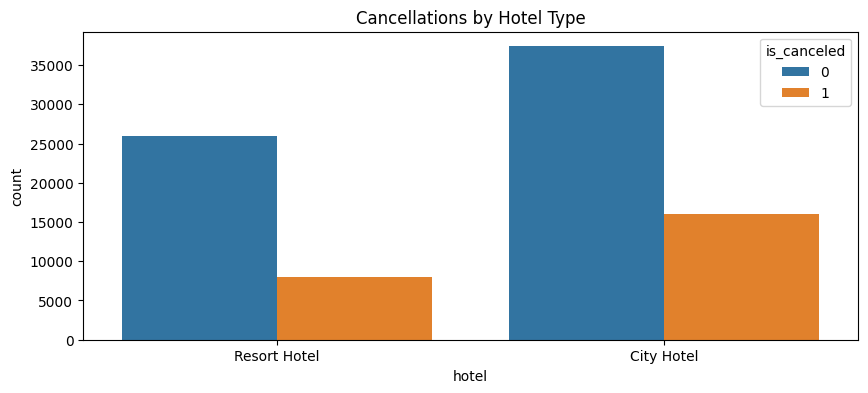

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(x='hotel', hue='is_canceled', data=data)
plt.title("Cancellations by Hotel Type")

Text(0.5, 1.0, 'Booking Lead Time Distribution')

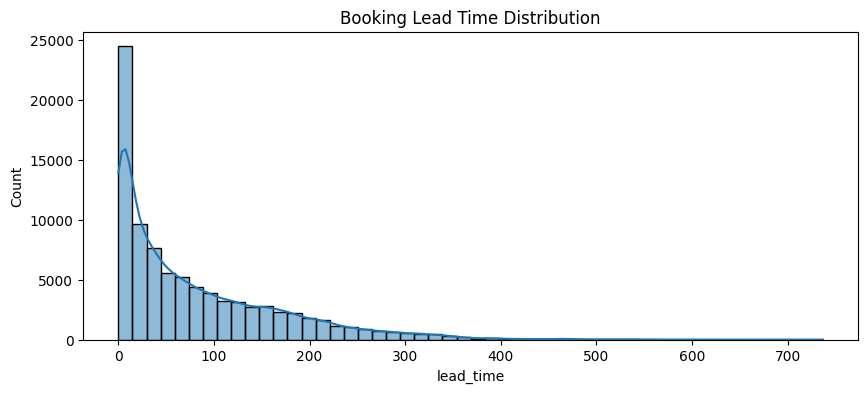

In [20]:
plt.figure(figsize=(10,4))
sns.histplot(data['lead_time'], bins=50, kde=True)
plt.title("Booking Lead Time Distribution")

In [21]:
plt.show()

In [25]:
from sentence_transformers import SentenceTransformer

In [8]:
import pandas as pd

data = pd.DataFrame({
    'hotel': ['Hotel A', 'Hotel B'],
    'stays_in_week_nights': [3, 5],
    'adr': [120.5, 95.0]
})

# Applying transformation
text_data = data.apply(
    lambda x: f"Hotel: {x['hotel']}, Nights: {x['stays_in_week_nights']}, Price: {x['adr']}€",
    axis=1
)

print(text_data)

0    Hotel: Hotel A, Nights: 3, Price: 120.5€
1     Hotel: Hotel B, Nights: 5, Price: 95.0€
dtype: object


In [9]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(text_data.tolist())

In [10]:
data.to_pickle('analytics_data.pkl')

In [13]:
import numpy as np
np.save('embeddings.npy', embeddings)